# Comparing Numerical values to Categorical and Qualitative Variables

Because it would take an extremely long time to plot every single relationship in this large dataset, the next steps will be to take the numerical relationships with the highest correlations and compare them to the categorical and qualitative variables in the dataset.

What factors affect a loan’s outcome status?
What affects the borrower’s APR or interest rate?
Are there differences between loans depending on how large the original loan amount was?

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
os.getcwd()

'/Users/6c/Documents/Data Analyst Nanodegree/5th Project'

In [10]:
correlation = pd.read_csv('Correlation_Values.csv')
df = pd.read_csv('ProsperLoanData.csv')
f_df = pd.read_csv('Focused_Bank_Info.csv')
pd.set_option('display.max_columns', 81)

In [67]:
f_df.sample(5)

,Unnamed: 0,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
25893,25893,36,Completed,0.12528,0.0974,0.0874,FL,Police Officer/Correction Officer,True,820.0,839.0,8.0,8.0,26.0,0.0,0.0,0.0,1559.0,17807.0,1.00,0.17,"$50,000-74,999",5416.666667,NaN,5000,160.73,5113.7400,5000.00,113.7400,99,829.5,65000.0
54219,54219,36,Chargedoff,0.25259,0.2148,0.2048,WI,Skilled Labor,False,700.0,719.0,5.0,5.0,21.0,0.0,0.0,14.0,0.0,750.0,0.83,0.10,"$25,000-49,999",3591.666667,NaN,4500,170.65,2419.1000,1460.50,958.6000,59,709.5,43100.0
54568,54568,36,Chargedoff,0.35797,0.3177,0.3077,IL,Analyst,True,700.0,719.0,12.0,10.0,29.0,0.0,0.0,0.0,42796.0,20253.0,1.00,0.26,"$100,000+",8333.333333,NaN,4000,173.71,2895.8100,1921.75,974.0600,6,709.5,100000.0
65069,65069,36,Current,0.17189,0.1355,0.1255,FL,Other,False,720.0,739.0,10.0,10.0,11.0,0.0,0.0,0.0,755.0,3248.0,1.00,NaN,"$25,000-49,999",2333.333333,NaN,4000,135.84,0.0000,0.00,0.0000,1,729.5,28000.0
35089,35089,36,Current,0.25013,0.2124,0.2024,NM,Professional,True,700.0,719.0,18.0,18.0,31.0,0.0,0.0,0.0,29109.0,15374.0,1.00,0.33,"$75,000-99,999",6666.666667,NaN,25000,944.96,4710.2521,2590.70,2119.5521,1,709.5,80000.0


## Categorical and Quantitative Variables

>Create a list of the non-numerical variables for visualizations later on.

In [29]:
print(df.info())
Non_num_list = ['LoanStatus', 'BorrowerSate', 'Occupation', 'IsBorrowerHomeowner', 'ProsperRating (Alpha)', 
               'EmploymentStatus', 'FirstRecordedCreditLine']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [13]:
correlation

,Unnamed: 0,Value,x_axis,y_axis
0,0,0.931984,LoanOriginalAmount,MonthlyLoanPayment
1,1,0.516443,DelinquenciesLast7Years,TradesNeverDelinquent (percentage)
2,2,0.468899,TradesNeverDelinquent (percentage),Credit_Score_Avg
3,3,0.458761,CurrentDelinquencies,TradesNeverDelinquent (percentage)
4,4,0.454350,LenderYield,Credit_Score_Avg
5,5,0.453257,AvailableBankcardCredit,Credit_Score_Avg
6,6,0.390476,MonthlyLoanPayment,LP_InterestandFees
7,7,0.387409,MonthlyLoanPayment,Investors
8,8,0.382268,ProsperPrincipalBorrowed,LoanOriginalAmount
9,9,0.382127,LP_InterestandFees,Investors


In [103]:
f_df.describe()

,Unnamed: 0,Term,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
count,113937.000000,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113240.000000,106315.000000,112947.000000,1.063330e+05,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113346.000000,1.139370e+05
mean,56968.000000,40.830248,0.218828,0.192764,0.182701,685.567731,704.567731,10.317192,9.260164,26.754539,0.592052,984.507059,4.154984,1.759871e+04,11210.225447,0.885897,0.275947,5.608026e+03,8472.311961,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,80.475228,695.067731,6.729631e+04
std,32890.923148,10.436212,0.080364,0.074818,0.074516,66.458275,66.458275,5.457866,5.022644,13.637871,1.978707,7158.270157,10.160216,3.293640e+04,19818.361309,0.148179,0.551759,7.478497e+03,7395.507650,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,103.239020,66.458275,8.974197e+04
min,0.000000,12.000000,0.006530,0.000000,-0.010000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,1.000000,9.500000,0.000000e+00
25%,28484.000000,36.000000,0.156290,0.134000,0.124200,660.000000,679.000000,7.000000,6.000000,17.000000,0.000000,0.000000,0.000000,3.121000e+03,880.000000,0.820000,0.140000,3.200333e+03,3500.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,2.000000,669.500000,3.840400e+04
50%,56968.000000,36.000000,0.209760,0.184000,0.173000,680.000000,699.000000,10.000000,9.000000,25.000000,0.000000,0.000000,0.000000,8.549000e+03,4100.000000,0.940000,0.220000,4.666667e+03,6000.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,44.000000,689.500000,5.600000e+04
75%,85452.000000,36.000000,0.283810,0.250000,0.240000,720.000000,739.000000,13.000000,12.000000,35.000000,0.000000,0.000000,3.000000,1.952100e+04,13180.000000,1.000000,0.320000,6.825000e+03,11000.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,115.000000,729.500000,8.190000e+04
max,113936.000000,60.000000,0.512290,0.497500,0.492500,880.000000,899.000000,59.000000,54.000000,136.000000,83.000000,463881.000000,99.000000,1.435667e+06,646285.000000,1.000000,10.010000,1.750003e+06,72499.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,1189.000000,889.500000,2.100004e+07


## Homeownership's effect on Loans

Does home ownership have an effect on wether or not the loan will fall into delinquency?
This plot seems to indicate that when the homeowners take out a loan, they are more likely to make payments on time, as shown in the x axis of the two plots. Homeowners, however, are more likely to have been late on a payment within the last seven years.  
> In the dataframe, 50.45% of the people who took out loans were homeowners, so there are no insights to be gained from percentage of homeowners.  

In [168]:
#Creates two datasets to work with wether the clients are homeowners or not
yhomeowner = f_df.query('IsBorrowerHomeowner == True')
nhomeowner = f_df.query('IsBorrowerHomeowner == False')
yhome_sample = yhomeowner.sample(7500)
nhome_sample = nhomeowner.sample(7500)

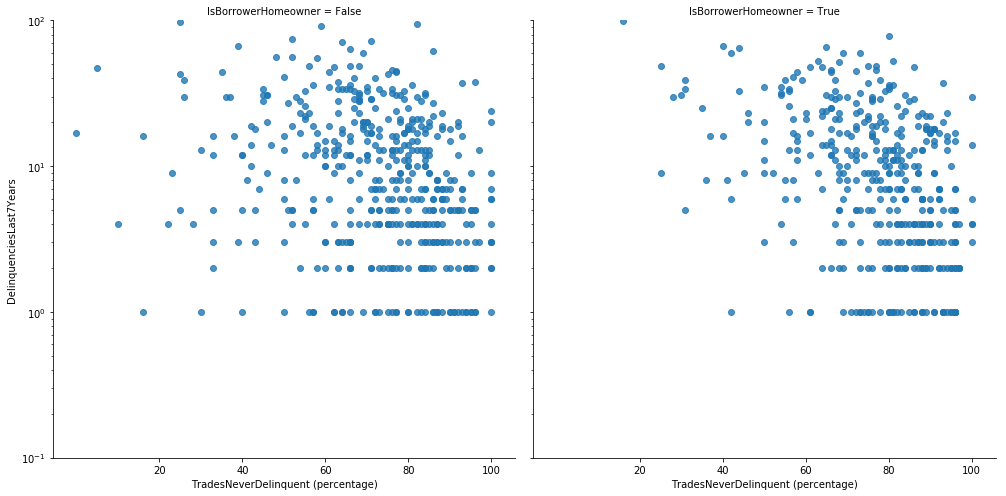

In [183]:
df_sample = df.sample(3000)
g = sb.FacetGrid(data = df_sample, col = 'IsBorrowerHomeowner', palette = 'viridis_r', height = 7, margin_titles = True);
g = g.map(sb.regplot, 'TradesNeverDelinquent (percentage)', 'DelinquenciesLast7Years',  fit_reg = False, );
df.IsBorrowerHomeowner.describe()
plt.xticks([0.2, 0.4, 0.6, 0.8, 1], [20, 40, 60, 80, 100]);
plt.ylim(0.1, 100);
plt.yscale('log')


Homeowners generally earn the bank less money than non homeowners and have a higher credit card limit than non homeowners.  

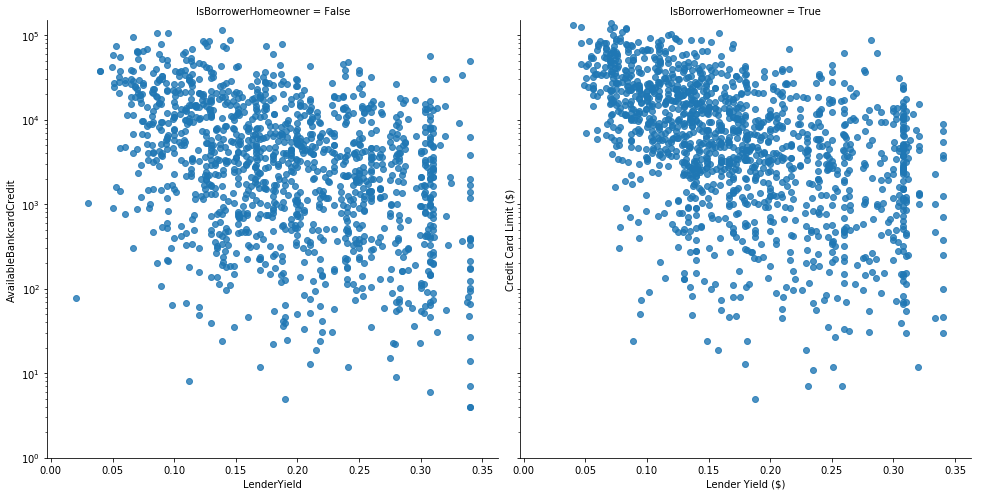

In [191]:
df_sample = df.sample(3000)
g = sb.FacetGrid(data = df_sample, col = 'IsBorrowerHomeowner', palette = 'viridis_r', height = 7, margin_titles = True);
g = g.map(sb.regplot, 'LenderYield', 'AvailableBankcardCredit',  fit_reg = False, );
plt.ylim(1, 150000);
plt.yscale('log')
plt.xlabel('Lender Yield ($)');
plt.ylabel('Credit Card Limit ($)');


Homeowners generally have higher credit scores and fewer missed payments than renters

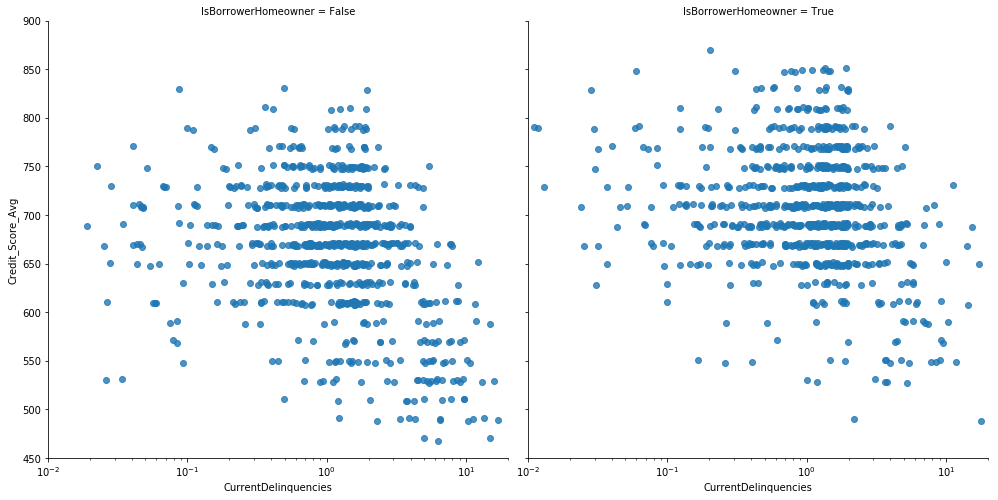

In [178]:
#Tried a heatmap, but most of the plot is washed out
df_sample = f_df.sample(3000)
g = sb.FacetGrid(data = df_sample, col = 'IsBorrowerHomeowner', palette = 'viridis_r', height = 7, margin_titles = True);
g = g.map(sb.regplot, 'CurrentDelinquencies', 'Credit_Score_Avg',  fit_reg = False, y_jitter = 2, x_jitter = 2);
plt.ylim(450, 900);
plt.xlim(.01, 20)
plt.xscale('log')



## Homeowner Heatmap

> Lender Yield vs. Original Amount frequency was plotted for both homeowners and renters.  

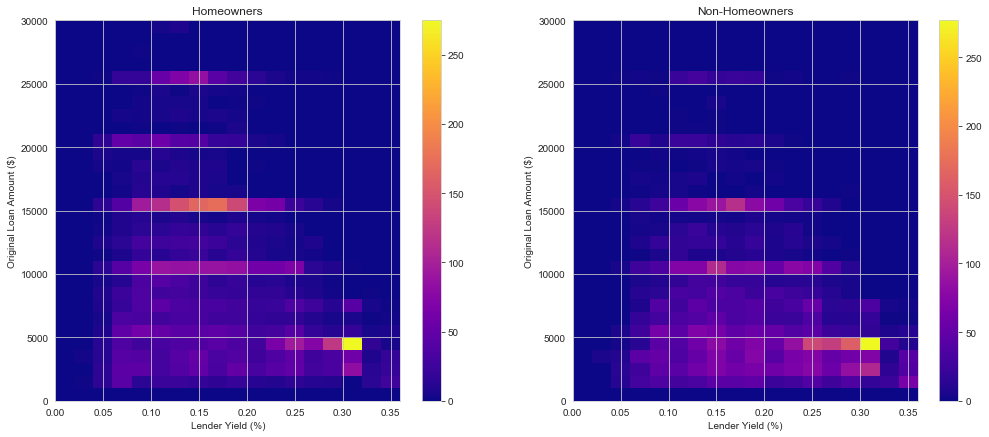

In [554]:
plt.figure(figsize = [17, 7])

plt.subplot(1, 2, 1)
bins_x = np.arange(0, 0.35 + 0.02, 0.02)
bins_y = np.arange(0, 30000 + 1000, 1000)
plt.hist2d(data = yhome_sample, x = 'LenderYield', y = 'LoanOriginalAmount', bins = [bins_x, bins_y], cmap = 'plasma')
plt.colorbar();
plt.xlabel('Lender Yield (%)')
plt.ylabel('Original Loan Amount ($)')
plt.title('Homeowners');

plt.subplot(1, 2, 2)
bins_x = np.arange(0, 0.35 + 0.02, 0.02)
bins_y = np.arange(0, 30000 + 1000, 1000)
plt.hist2d(data = nhome_sample, x = 'LenderYield', y = 'LoanOriginalAmount', bins = [bins_x, bins_y], cmap = 'plasma')
plt.colorbar();
plt.xlabel('Lender Yield (%)')
plt.ylabel('Original Loan Amount ($)')
plt.title('Non-Homeowners');



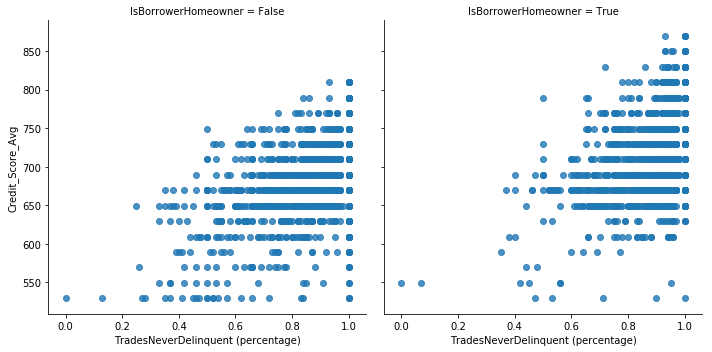

In [84]:
g = sb.FacetGrid(data = df_sample, col = 'IsBorrowerHomeowner', palette = 'viridis_r', height = 5, margin_titles = True);
g = g.map(sb.regplot, 'TradesNeverDelinquent (percentage)', 'Credit_Score_Avg',  fit_reg = False);


# Which states are the best to get a loan?

> By best, I mean highest interest rates and where do residents borrow the most

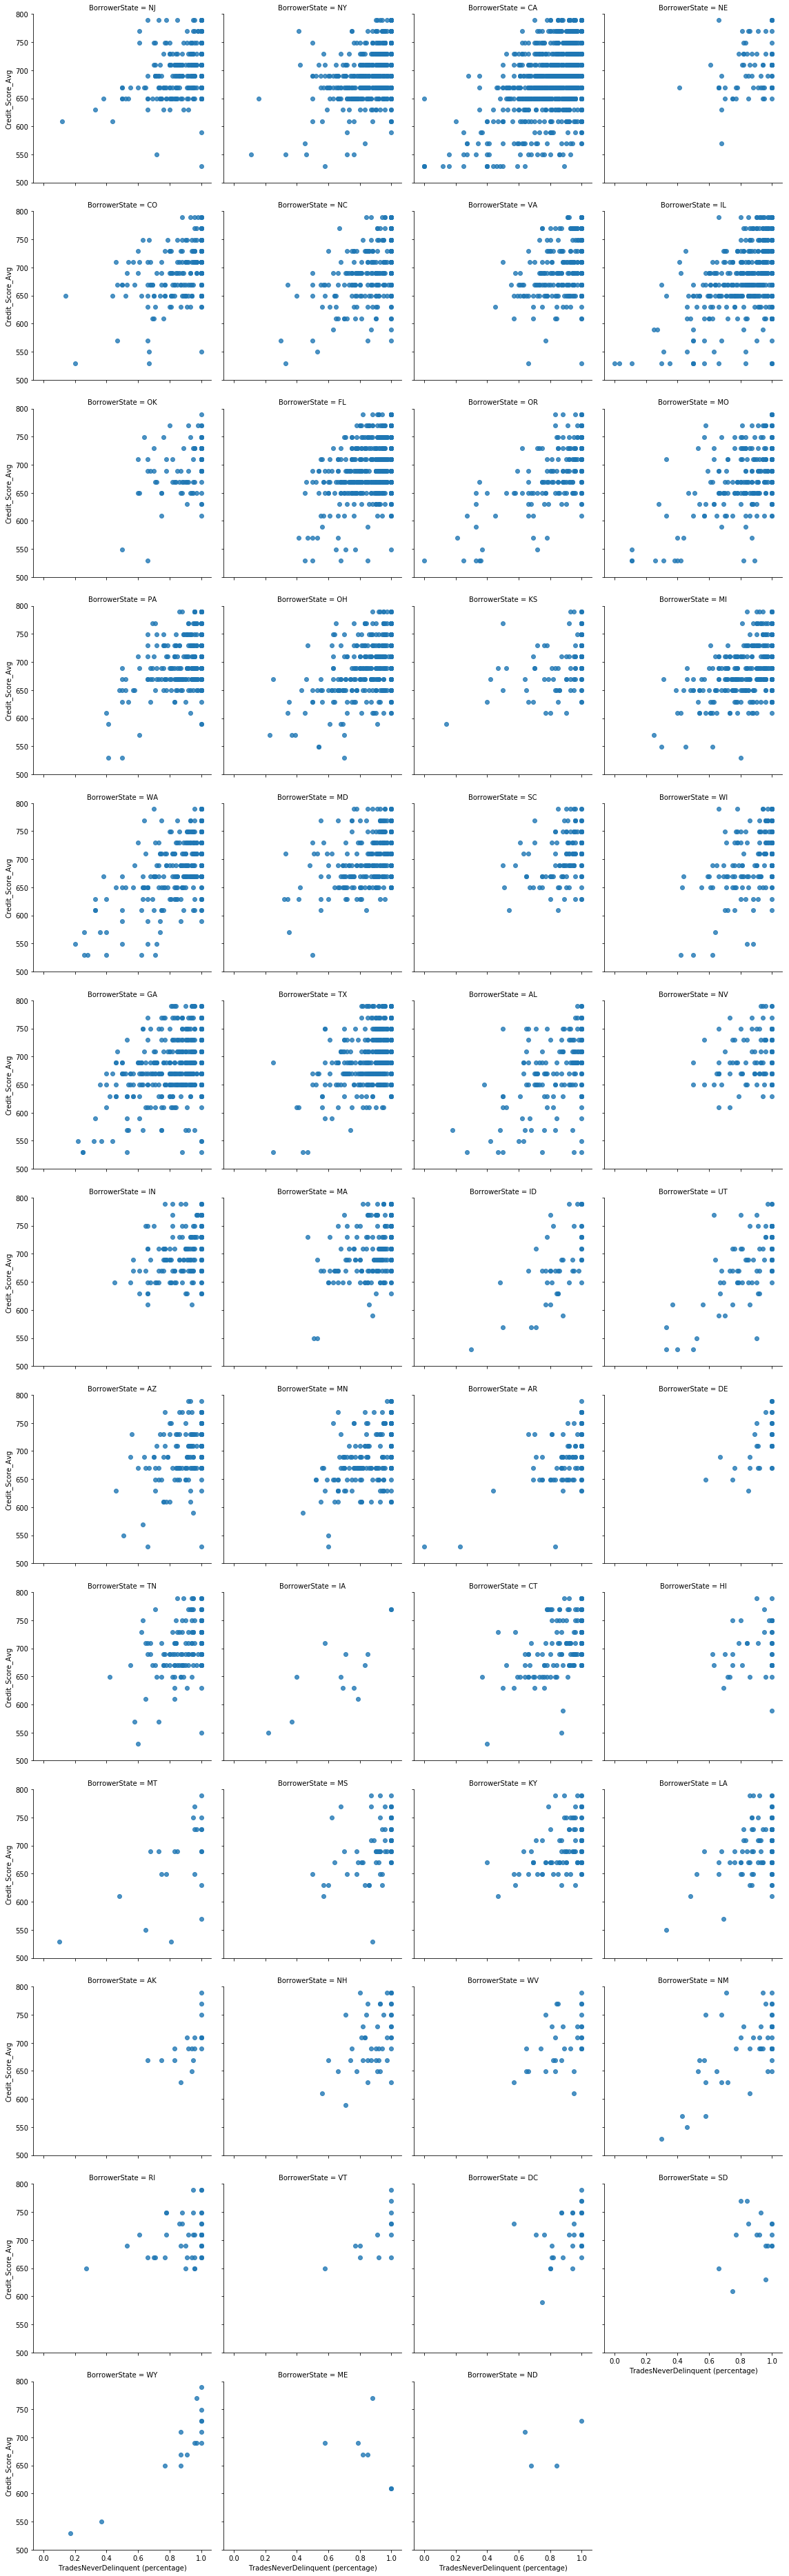

In [91]:
df_sample = f_df.sample(11300)
g = sb.FacetGrid(data = df_sample, col = 'BorrowerState', palette = 'viridis_r', col_wrap = 4, height = 4, margin_titles = True);
g = g.map(sb.regplot, 'TradesNeverDelinquent (percentage)', 'Credit_Score_Avg',  fit_reg = False);
plt.ylim(500, 800);



In [212]:
f_df.head()

,Unnamed: 0,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income,loan_mean
0,0,36,Completed,0.16516,0.1580,0.1380,CO,Other,True,640.0,659.0,5.0,4.0,12.0,2.0,472.0,4.0,0.0,1500.0,0.81,0.17,"$25,000-49,999",3083.333333,NaN,9425,330.43,11396.14,9425.00,1971.14,258,649.5,37000.0,8337.01385
1,1,36,Current,0.12016,0.0920,0.0820,CO,Professional,False,680.0,699.0,14.0,14.0,29.0,0.0,0.0,0.0,3989.0,10266.0,1.00,0.18,"$50,000-74,999",6125.000000,NaN,10000,318.93,0.00,0.00,0.00,1,689.5,73500.0,8337.01385
2,2,36,Completed,0.28269,0.2750,0.2400,GA,Other,False,480.0,499.0,NaN,NaN,3.0,1.0,NaN,0.0,NaN,NaN,NaN,0.06,Not displayed,2083.333333,NaN,3001,123.32,4186.63,3001.00,1185.63,41,489.5,25000.0,8337.01385
3,3,36,Current,0.12528,0.0974,0.0874,GA,Skilled Labor,True,800.0,819.0,5.0,5.0,29.0,4.0,10056.0,14.0,1444.0,30754.0,0.76,0.15,"$25,000-49,999",2875.000000,NaN,10000,321.45,5143.20,4091.09,1052.11,158,809.5,34500.0,8337.01385
4,4,36,Current,0.24614,0.2085,0.1985,MN,Executive,True,680.0,699.0,19.0,19.0,49.0,0.0,0.0,0.0,6193.0,695.0,0.95,0.26,"$100,000+",9583.333333,11000.0,15000,563.97,2819.85,1563.22,1256.63,20,689.5,115000.0,8337.01385


In [275]:
loanstatemean = f_df.groupby('BorrowerState').LoanOriginalAmount.mean()
loanstateintrest = f_df.groupby('BorrowerState').BorrowerRate.mean()

loanstateintrest = loanstateintrest.reset_index()
loanstatemean = loanstatemean.reset_index()
loanstateintrest.info()#, loanstateintrest]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
BorrowerState    51 non-null object
BorrowerRate     51 non-null float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [276]:
intrest_v_loan = loanstatemean.merge(loanstateintrest, how = 'left', on = 'BorrowerState')


,BorrowerState,LoanOriginalAmount,BorrowerRate
0,AK,9311.805000,0.184665
1,AL,7555.955926,0.212014
2,AR,7696.898246,0.206303
3,AZ,8199.756444,0.191326
4,CA,8974.325814,0.192266
5,CO,8598.823529,0.185871
6,CT,9129.649662,0.190433
7,DC,10125.751309,0.174459
8,DE,8840.586667,0.180159
9,FL,8207.460565,0.191707


Sorted the Loan amounts and compared them to the highest interest rates

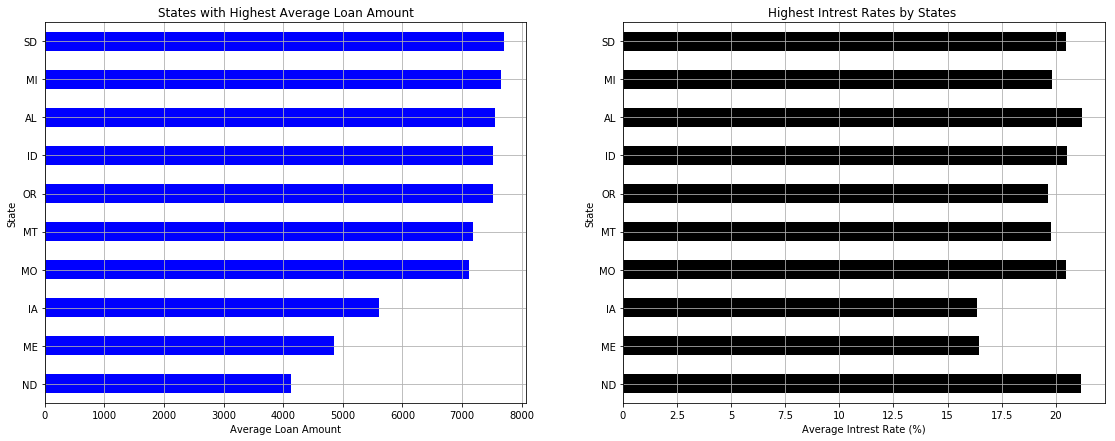

In [362]:
location = [0,1,2,3,4,5,6,7,8,9]
intest_v_loansort = intrest_v_loan.sort_values('LoanOriginalAmount', ascending = True).head(10)
intestsort_v_loan = intrest_v_loan.sort_values('BorrowerRate', ascending = True).head(10)

plt.figure(figsize = [19, 7])
plt.subplot(1, 2, 1)
intest_v_loansort['LoanOriginalAmount'].plot.barh(color = 'blue', label = 'Loan Amount');
plt.grid()
plt.yticks(location, intest_v_loansort.BorrowerState);
plt.xlabel('Average Loan Amount')
plt.ylabel('State');
plt.title("States with Highest Average Loan Amount");

plt.subplot(1, 2, 2)
intest_v_loansort['BorrowerRate'].plot.barh(color = 'black', label = 'Intrest Rate');
plt.grid()
plt.yticks(location, intest_v_loansort.BorrowerState);
plt.xlabel('Average Intrest Rate (%)')
plt.ylabel('State');
plt.title("Highest Intrest Rates by States ");
plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);
plt.show()

In [379]:
intestsort_v_loan = intrest_v_loan.sort_values(by = 'BorrowerRate', ascending = True).tail(10)
intestsort_v_loan

,BorrowerState,LoanOriginalAmount,BorrowerRate
42,TN,8115.069085,0.199940
17,KY,8545.389624,0.201478
33,NV,8796.280734,0.201963
25,MS,8265.705210,0.204492
24,MO,7122.427533,0.204667
41,SD,7694.518519,0.204842
13,ID,7525.479132,0.205132
2,AR,7696.898246,0.206303
28,ND,4138.653846,0.211473
1,AL,7555.955926,0.212014


Sorted the interest rates and compared that to the loan amounts

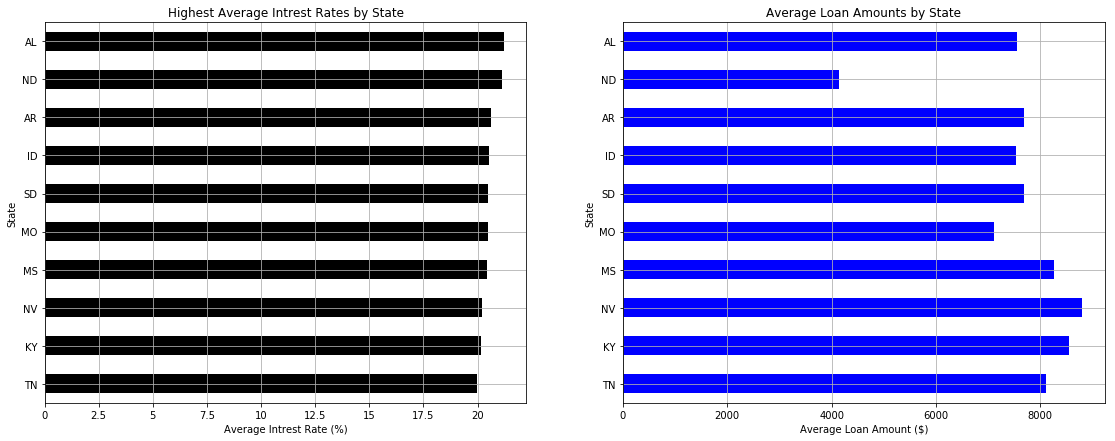

In [381]:
plt.figure(figsize = [19, 7])
plt.subplot(1, 2, 1)
intestsort_v_loan['BorrowerRate'].plot.barh(color = 'black', label = 'Intrest Rate');
plt.grid()
plt.yticks(location, intestsort_v_loan.BorrowerState);
plt.xlabel('Average Intrest Rate (%)')
plt.ylabel('State');
plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);
plt.title("Highest Average Intrest Rates by State");

plt.subplot(1, 2, 2)
intestsort_v_loan['LoanOriginalAmount'].plot.barh(color = 'blue', label = 'Intrest Rate');
plt.grid()
plt.yticks(location, intestsort_v_loan.BorrowerState);
plt.xlabel('Average Loan Amount ($)')
plt.ylabel('State');
plt.title("Average Loan Amounts by State");
plt.show()

# Which Professions Borrow the Most?
> When 'the Most' is used, I am referring both to principal and intrest payments

In [383]:
#find out about which profesions are accounted for and remove "Other" and "Professional" categories
f_df.Occupation.value_counts()
profession = f_df.query('Occupation != "Other" and Occupation != "Professional"')
profession.head()

,Unnamed: 0,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
3,3,36,Current,0.12528,0.0974,0.0874,GA,Skilled Labor,True,800.0,819.0,5.0,5.0,29.0,4.0,10056.0,14.0,1444.0,30754.0,0.76,0.15,"$25,000-49,999",2875.000000,NaN,10000,321.45,5143.20,4091.09,1052.11,158,809.5,34500.0
4,4,36,Current,0.24614,0.2085,0.1985,MN,Executive,True,680.0,699.0,19.0,19.0,49.0,0.0,0.0,0.0,6193.0,695.0,0.95,0.26,"$100,000+",9583.333333,11000.0,15000,563.97,2819.85,1563.22,1256.63,20,689.5,115000.0
6,6,36,Current,0.31032,0.2712,0.2612,KS,Sales - Retail,False,680.0,699.0,10.0,7.0,20.0,0.0,0.0,0.0,5812.0,1929.0,0.68,0.27,"$25,000-49,999",2083.333333,NaN,3000,122.67,1226.70,604.25,622.45,1,689.5,25000.0
7,7,36,Current,0.23939,0.2019,0.1919,CA,Laborer,False,700.0,719.0,6.0,6.0,10.0,0.0,0.0,0.0,1260.0,2181.0,0.80,0.24,"$25,000-49,999",3355.750000,NaN,10000,372.60,3353.40,1955.89,1397.51,1,709.5,40269.0
8,8,36,Current,0.07620,0.0629,0.0529,IL,Food Service,True,820.0,839.0,17.0,16.0,32.0,0.0,0.0,0.0,9906.0,77696.0,1.00,0.25,"$25,000-49,999",3333.333333,NaN,10000,305.54,611.08,505.58,105.50,1,829.5,40000.0


Lender yield vs original amount by profession

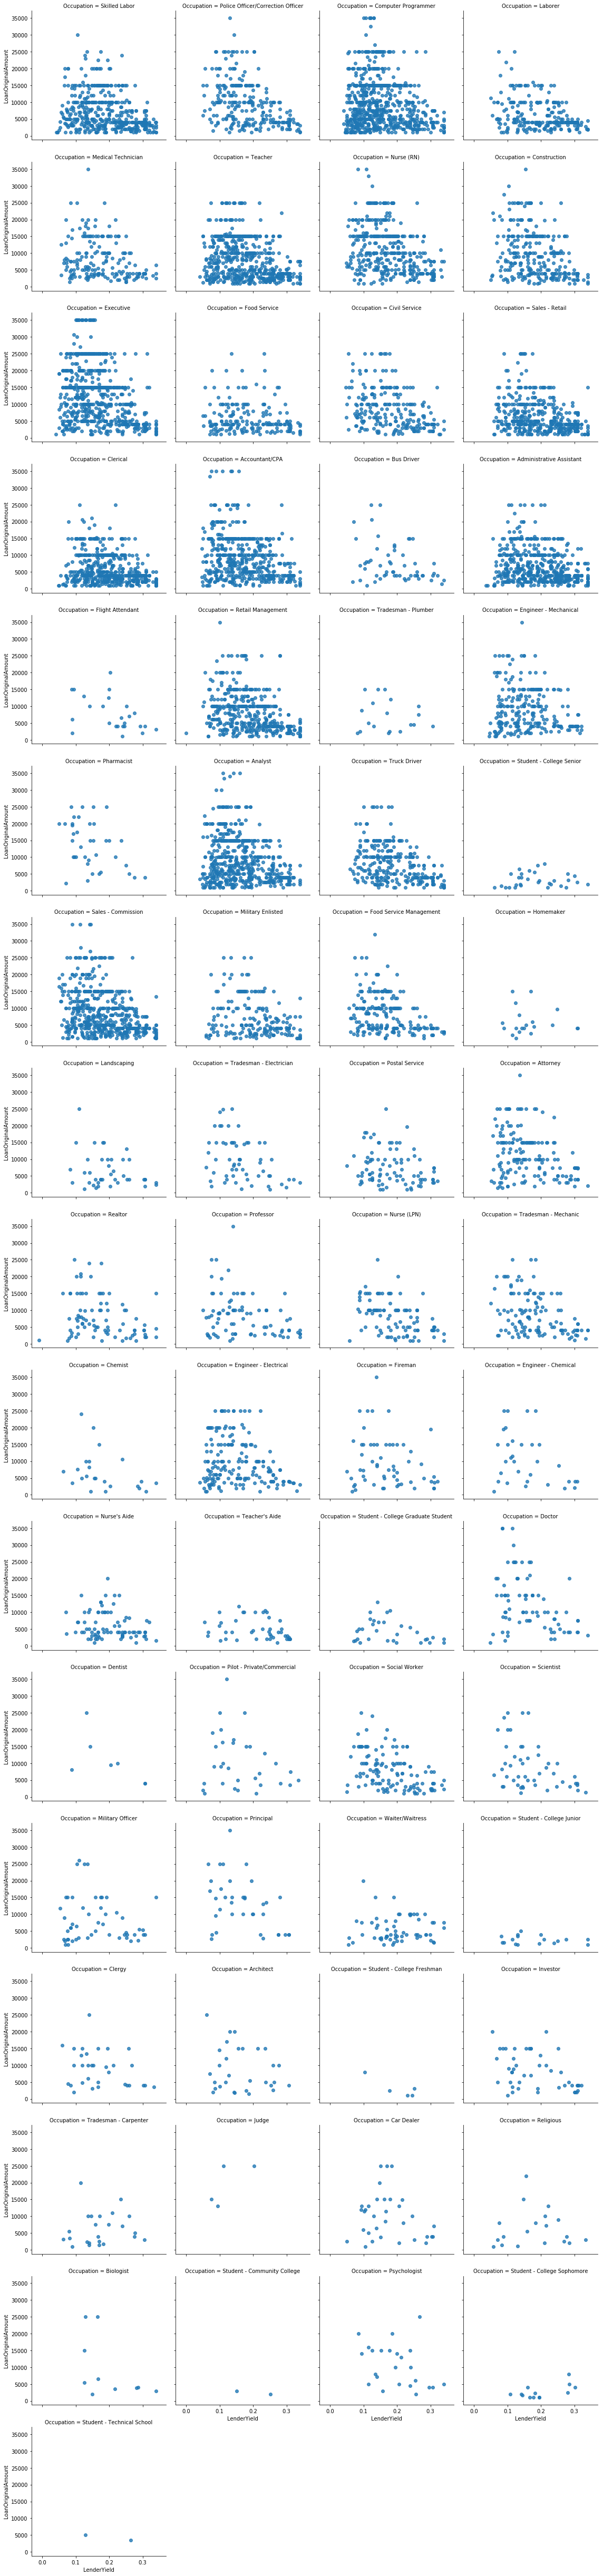

In [387]:
df_sample = profession.sample(11300)
g = sb.FacetGrid(data = df_sample, col = 'Occupation', palette = 'viridis_r', col_wrap = 4, height = 4, margin_titles = True);
g = g.map(sb.regplot, 'LenderYield', 'LoanOriginalAmount',  fit_reg = False);



Is there a correlation between income and credit score by profession

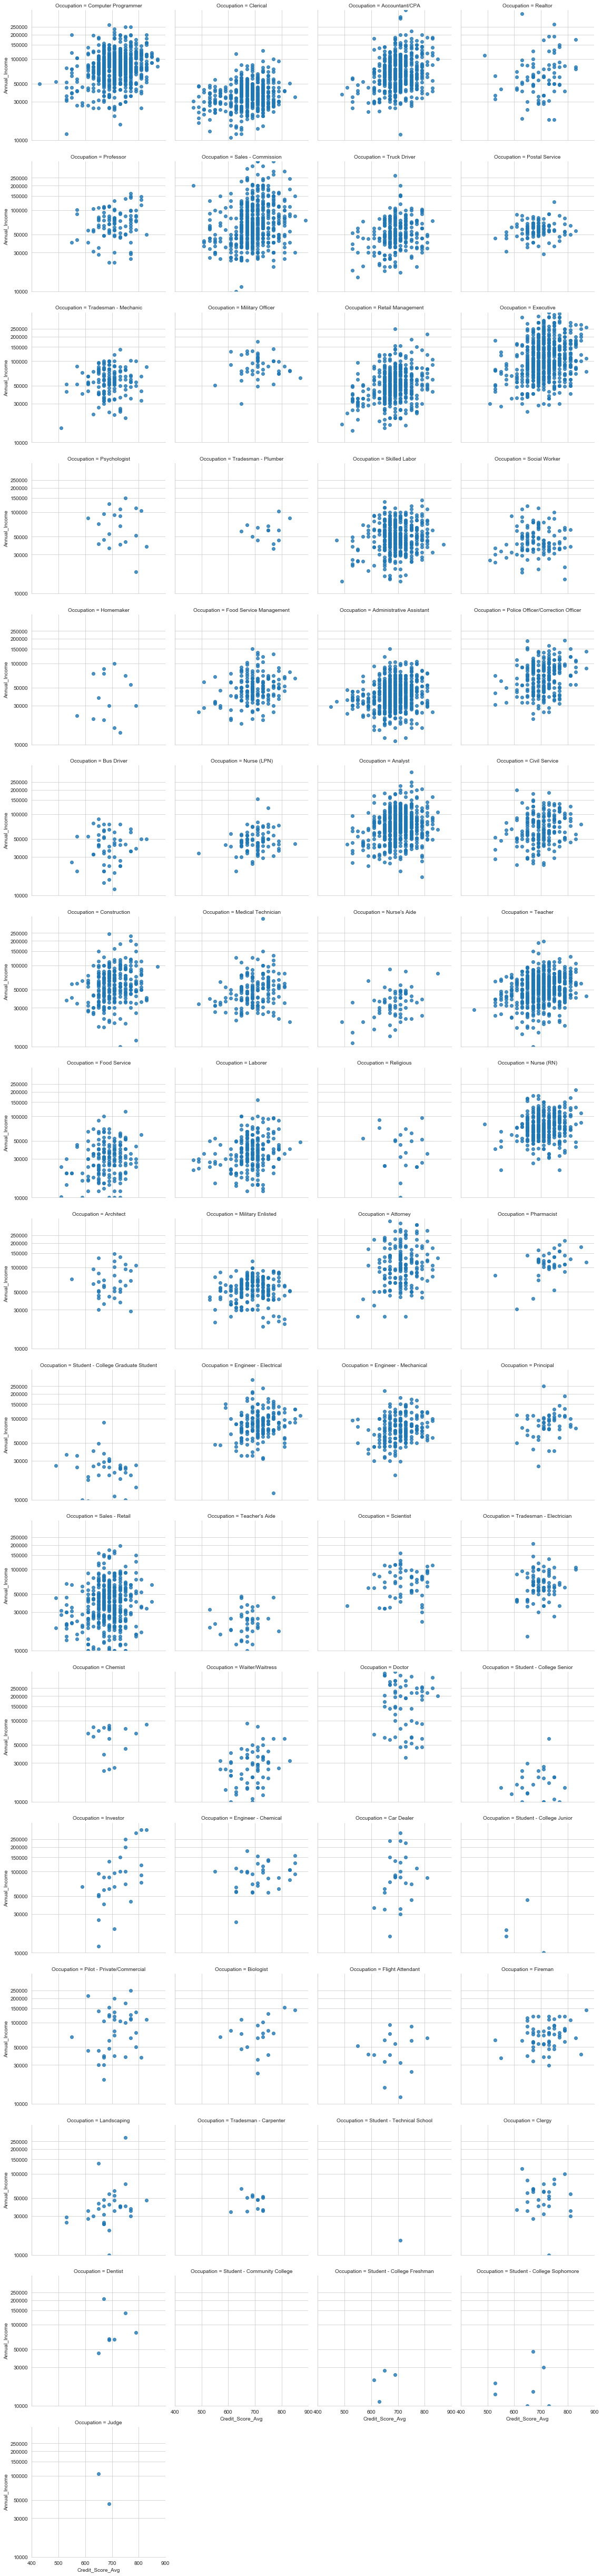

In [415]:
df_sample = profession.sample(11300)
g = sb.FacetGrid(data = df_sample, col = 'Occupation', palette = 'viridis_r', col_wrap = 4, height = 4, margin_titles = True);
g = g.map(sb.regplot, 'Credit_Score_Avg', 'Annual_Income', fit_reg = False, );

plt.ylim(10000, 400000);
plt.xlim(400, 900);
plt.yscale('log')
plt.yticks([10000, 30000, 50000, 100000, 150000, 200000, 250000], [10000, 30000, 50000, 100000, 150000, 200000, 250000]);


Is there a correlation between salary and the amount borrowed by profession?

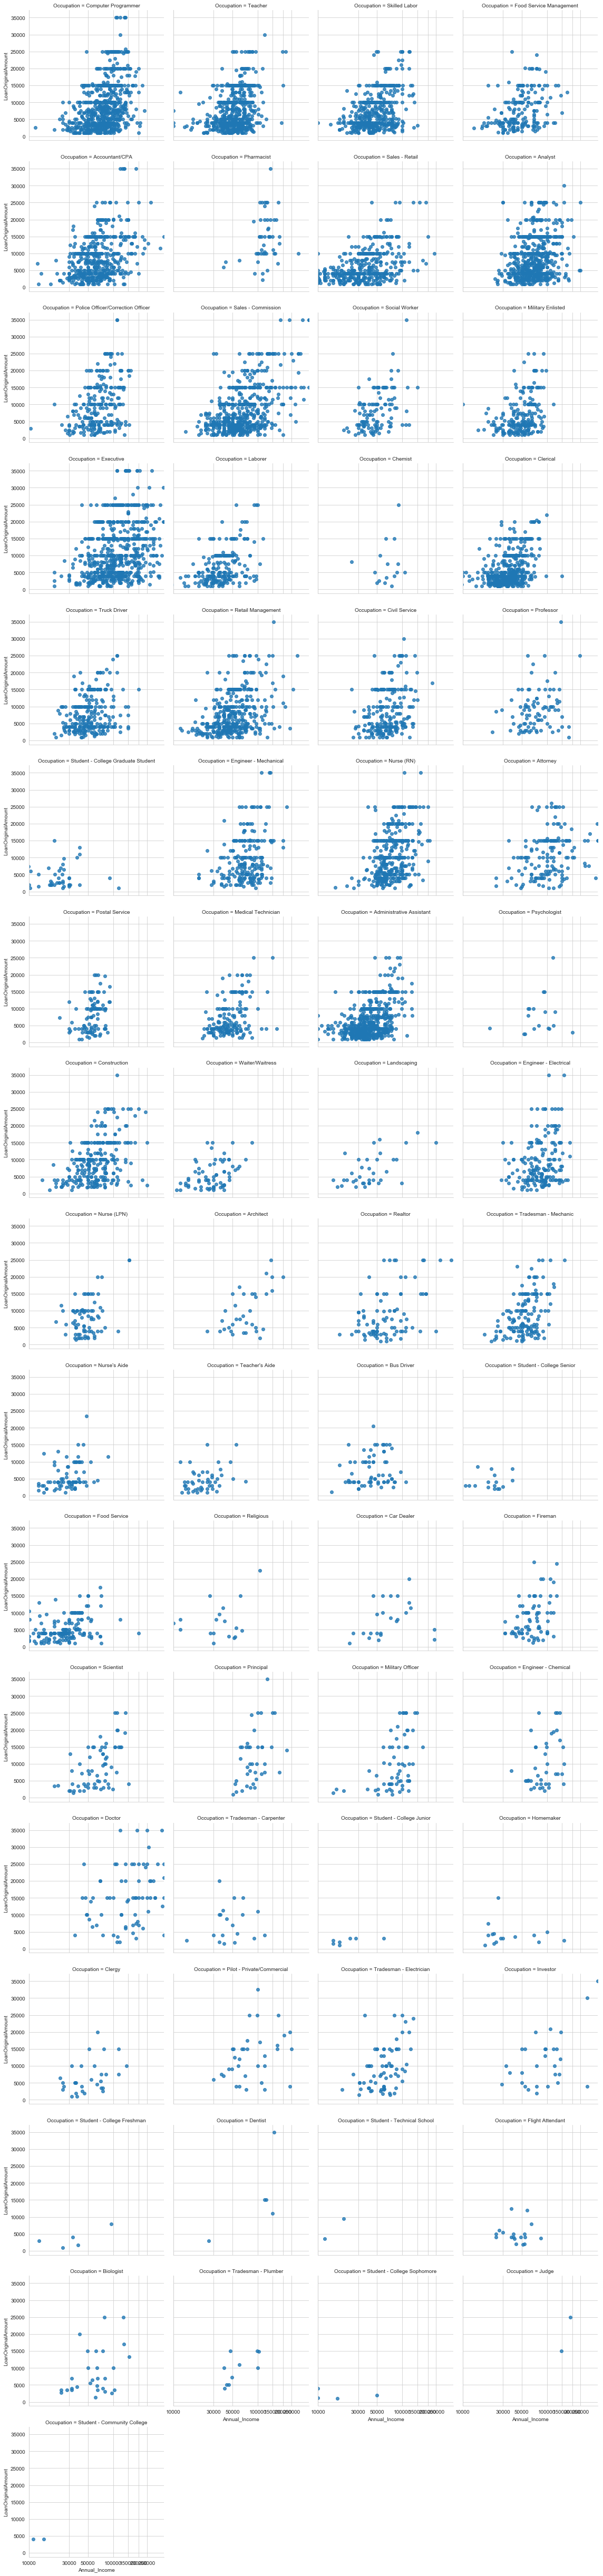

In [419]:
df_sample = profession.sample(11300)
g = sb.FacetGrid(data = df_sample, col = 'Occupation', palette = 'viridis_r', col_wrap = 4, height = 4, margin_titles = True);
g = g.map(sb.regplot, 'Annual_Income', 'LoanOriginalAmount', fit_reg = False);
plt.xscale('log')
plt.xlim(10000, 400000);
plt.xticks([10000, 30000, 50000, 100000, 150000, 200000, 250000], [10000, 30000, 50000, 100000, 150000, 200000, 250000]);
#Annual_Income vs LoanOriginalAmount


In [555]:
#Creating a dataset to explore how people in different occupations borrow money

profession_loan_amt = profession.groupby('Occupation').LoanOriginalAmount.mean()
profession_income = profession.groupby('Occupation').Annual_Income.mean()
profession_count = profession.groupby('Occupation').ProsperPrincipalBorrowed.count()
profession_DebtRatio = profession.groupby('Occupation').DebtToIncomeRatio.mean()
profession_yield = profession.groupby('Occupation').LenderYield.mean()

profession_loan_amt.reset_index()
profession_income.reset_index()
profession_count.reset_index()
profession_DebtRatio.reset_index()
profession_yield.reset_index()

profession_loan_amt = pd.DataFrame(data = profession_loan_amt)
profession_income = pd.DataFrame(data = profession_income)
profession_count = pd.DataFrame(data = profession_count)
profession_DebtRatio = pd.DataFrame(data = profession_DebtRatio)
profession_yield = pd.DataFrame(data = profession_yield)

profession_avg = profession_loan_amt.merge(profession_income, how = 'left', on = 'Occupation')
profession_avg = profession_avg.merge(profession_count, how = 'left', on = 'Occupation')
profession_avg = profession_avg.merge(profession_DebtRatio, how = 'left', on = 'Occupation')
profession_avg = profession_avg.merge(profession_yield, how = 'left', on = 'Occupation')

profession_avg.reset_index(inplace = True)

profession_avg.rename(index=str, columns={"ProsperPrincipalBorrowed": "NumLoans"})

#No Loans were taken out by this category, so it will be dropped
profession_avg[~profession_avg.Occupation.str.contains("Student - Technical School")] 

#profession_avg.sample(5)
profession_avg.shape

(65, 6)

In [487]:
prof_income = profession_avg.sort_values(by = 'Annual_Income', ascending = True).tail(20)


Is there a correlation between profession and the amount borrowed?

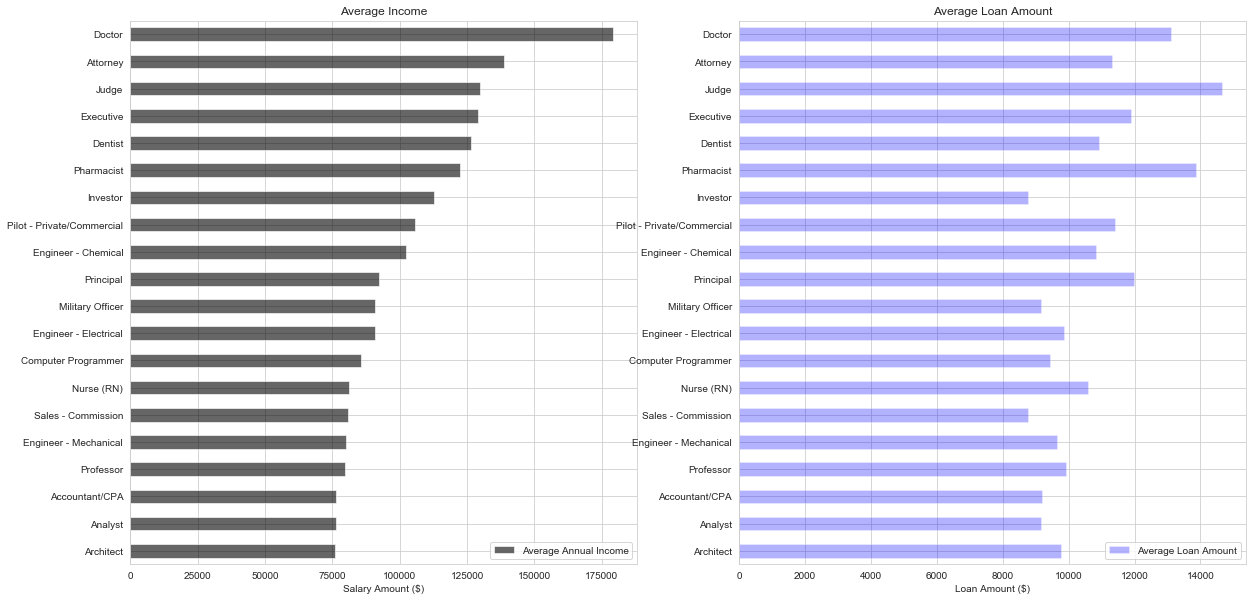

In [490]:
location = [0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#sorts the values into the correct order
plt.figure(figsize = [20, 10])
plt.subplot(1, 2, 1)

plt.grid(which = 'major', axis = 'both')
prof_income['Annual_Income'].plot.barh(alpha = 0.6, color = 'black', label = 'Average Annual Income');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Salary Amount ($)')
plt.legend(loc = 'lower right');
plt.title("Average Income");

plt.subplot(1, 2, 2)
prof_income['LoanOriginalAmount'].plot.barh(alpha = 0.3, color = 'blue', label = 'Average Loan Amount');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Loan Amount ($)')
plt.legend(loc = 'lower right');
plt.title("Average Loan Amount");
plt.show()

It turns out that the more money someone makes, the more money they are likely to borrow 

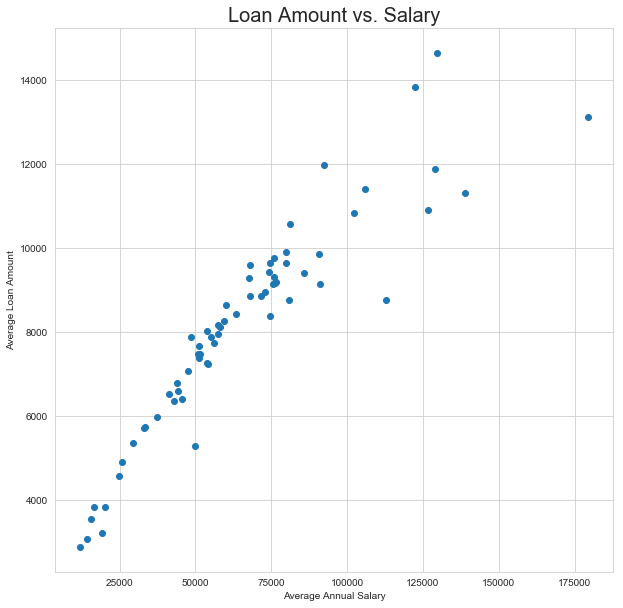

In [494]:
plt.scatter(data = profession_avg, x = "Annual_Income", y = 'LoanOriginalAmount');
plt.xlabel('Average Annual Salary');
plt.title('Loan Amount vs. Salary', fontsize = 20)
plt.ylabel('Average Loan Amount');

Sorted by highest debt to income ratio and income and saw some interesting results: namely that homemakers average \\$2 of debt per dollar they make: which is about \\$100,000 of debt at an average income of approximately \\$50,000 per year

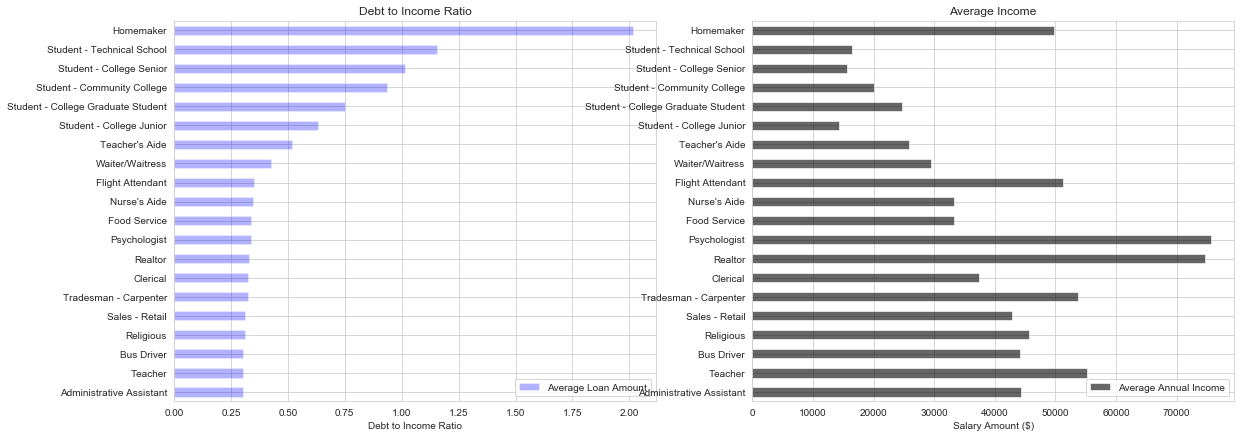

In [501]:
prof_income = profession_avg.sort_values(by = 'DebtToIncomeRatio', ascending = True).tail(20)

location = [0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#sorts the values into the correct order
plt.figure(figsize = [19, 7])

plt.subplot(1, 2, 1)
prof_income['DebtToIncomeRatio'].plot.barh(alpha = 0.3, color = 'blue', label = 'Average Loan Amount');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Debt to Income Ratio')
plt.legend(loc = 'lower right');
plt.title("Debt to Income Ratio");

plt.subplot(1, 2, 2)
plt.grid(which = 'major', axis = 'both')
prof_income['Annual_Income'].plot.barh(alpha = 0.6, color = 'black', label = 'Average Annual Income');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Salary Amount ($)')
plt.legend(loc = 'lower right');
plt.title("Average Income");

plt.show()

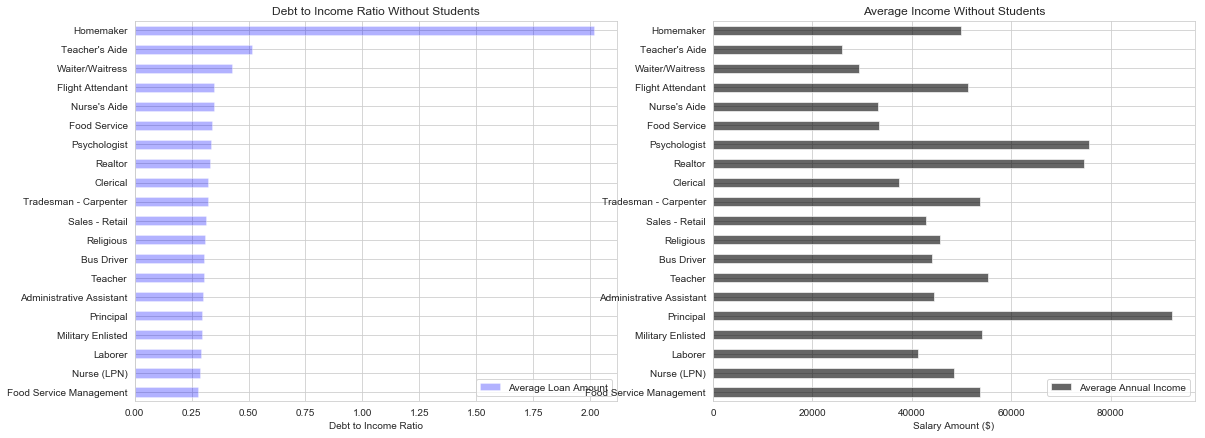

In [523]:
no_students = profession_avg[~profession_avg.Occupation.str.contains("Student")] 
prof_income_no_students = no_students.sort_values(by = 'DebtToIncomeRatio', ascending = True).tail(20)

location = [0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

plt.figure(figsize = [19, 7])
plt.subplot(1, 2, 1)
prof_income_no_students['DebtToIncomeRatio'].plot.barh(alpha = 0.3, color = 'blue', label = 'Average Loan Amount');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Debt to Income Ratio')
plt.legend(loc = 'lower right');
plt.title("Debt to Income Ratio Without Students");

plt.subplot(1, 2, 2)
plt.grid(which = 'major', axis = 'both')
prof_income_no_students['Annual_Income'].plot.barh(alpha = 0.6, color = 'black', label = 'Average Annual Income');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Salary Amount ($)')
plt.legend(loc = 'lower right');
plt.title("Average Income Without Students");

plt.show()

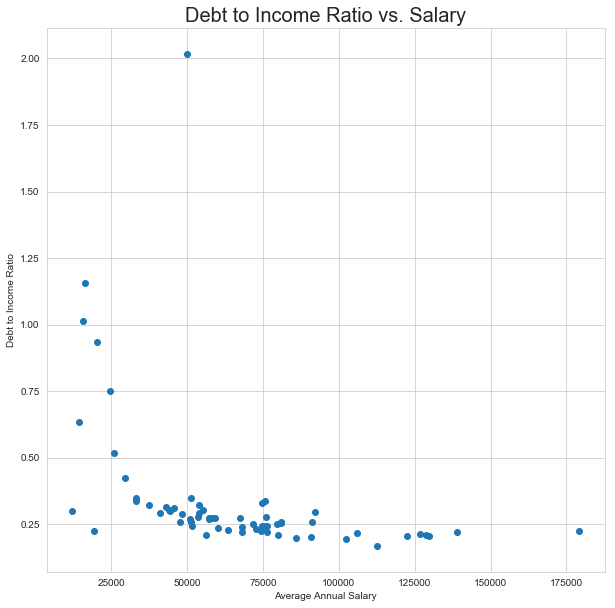

In [497]:
plt.scatter(data = profession_avg, x = "Annual_Income", y = 'DebtToIncomeRatio');
plt.xlabel('Average Annual Salary');
plt.title('Debt to Income Ratio vs. Salary', fontsize = 20)
plt.ylabel('Debt to Income Ratio');

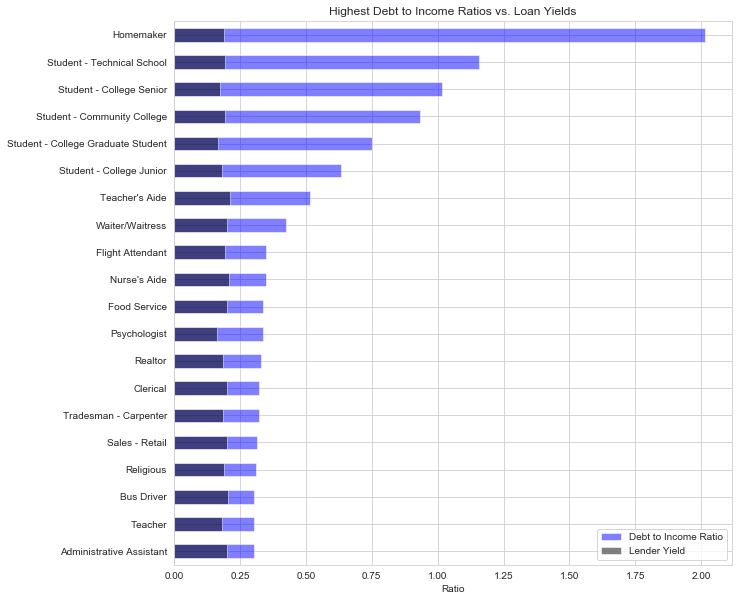

In [521]:
#DebtToIncomeRatio LenderYield
prof_income = profession_avg.sort_values(by = 'DebtToIncomeRatio', ascending = True).tail(20)

prof_income['DebtToIncomeRatio'].plot.barh(alpha = 0.5, color = 'blue', label = 'Debt to Income Ratio');
prof_income['LenderYield'].plot.barh(alpha = 0.5, color = 'black', label = 'Lender Yield');

plt.yticks(location, prof_income.Occupation);
#plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);
plt.xlabel('Ratio')
plt.legend(loc = 'lower right');
plt.title("Highest Debt to Income Ratios vs. Loan Yields");
plt.show()

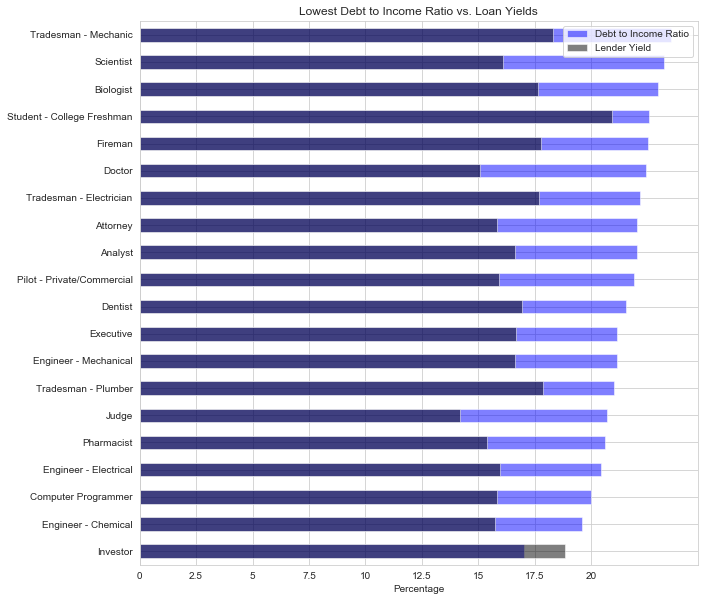

In [519]:
prof_income = profession_avg.sort_values(by = 'DebtToIncomeRatio', ascending = True).head(20)

prof_income['DebtToIncomeRatio'].plot.barh(alpha = 0.5, color = 'blue', label = 'Debt to Income Ratio');
prof_income['LenderYield'].plot.barh(alpha = 0.5, color = 'black', label = 'Lender Yield');

plt.yticks(location, prof_income.Occupation);
plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);

plt.xlabel('Percentage')
plt.legend();
plt.title("Lowest Debt to Income Ratio vs. Loan Yields");
plt.show()

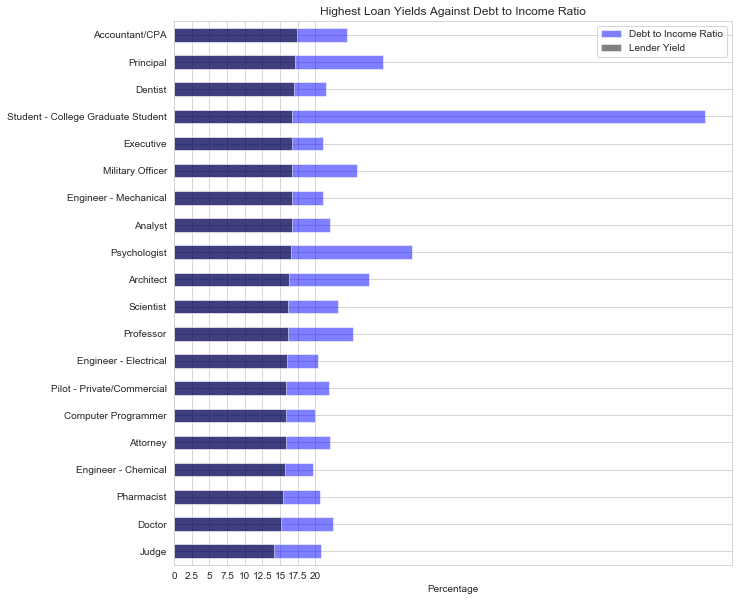

In [537]:
prof_income = profession_avg.sort_values(by = 'LenderYield', ascending = True).head(20)
prof_income['DebtToIncomeRatio'].plot.barh(alpha = 0.5, color = 'blue', label = 'Debt to Income Ratio');
prof_income['LenderYield'].plot.barh(alpha = 0.5, color = 'black', label = 'Lender Yield');

plt.yticks(location, prof_income.Occupation);
plt.xticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]);
plt.xlabel('Percentage')
plt.legend();
plt.title("Highest Loan Yields Against Debt to Income Ratio");
plt.show()

In [530]:
no_students = profession_avg[~profession_avg.Occupation.str.contains("Student")] 
prof_income_no_students = no_students.sort_values(by = 'LenderYield', ascending = True).tail(20)
prof_income_no_students

,Occupation,LoanOriginalAmount,Annual_Income,ProsperPrincipalBorrowed,DebtToIncomeRatio,LenderYield
63,Truck Driver,8180.587463,57319.855522,255,0.271238,0.187905
29,Medical Technician,7667.664279,51317.129812,176,0.260700,0.188045
28,Landscaping,7079.843220,47660.826271,42,0.257259,0.188090
25,Investor,8760.803738,112687.121495,66,0.170152,0.188321
44,Retail Management,8266.232129,59253.972329,470,0.272300,0.188699
38,Postal Service,8124.775120,58165.968102,133,0.272977,0.189408
43,Religious,6400.008065,45610.419355,37,0.310700,0.190959
24,Homemaker,5289.750000,49782.616667,14,2.015455,0.191562
21,Flight Attendant,7381.422764,51235.471545,27,0.350325,0.191728
32,Nurse (LPN),7880.205285,48420.430894,69,0.287221,0.196705


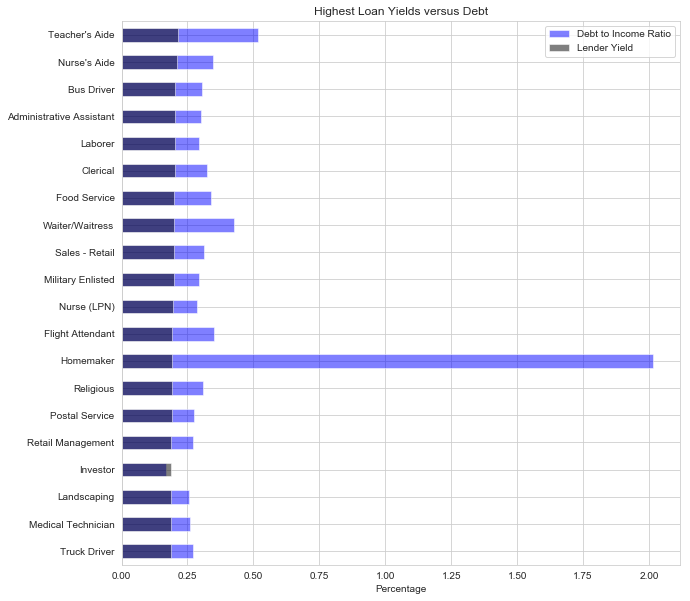

In [533]:
prof_income_no_students['DebtToIncomeRatio'].plot.barh(alpha = 0.5, color = 'blue', label = 'Debt to Income Ratio');
prof_income_no_students['LenderYield'].plot.barh(alpha = 0.5, color = 'black', label = 'Lender Yield');
plt.yticks(location, prof_income_no_students.Occupation);
plt.xlabel('Percentage')
plt.legend();
plt.title("Highest Loan Yields versus Debt");
plt.show()

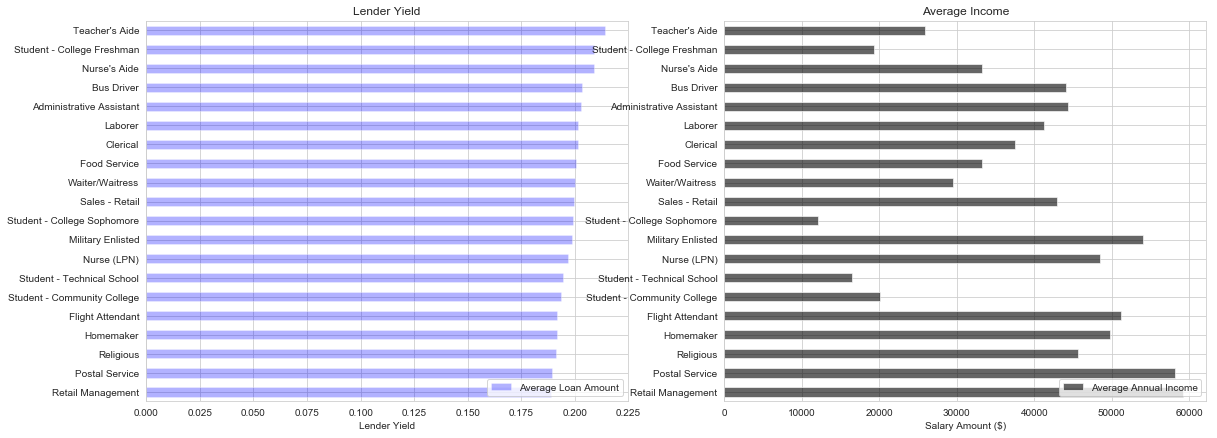

In [536]:
prof_income = profession_avg.sort_values(by = 'LenderYield', ascending = True).tail(20)

location = [0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#sorts the values into the correct order
plt.figure(figsize = [19, 7])

plt.subplot(1, 2, 1)
prof_income['LenderYield'].plot.barh(alpha = 0.3, color = 'blue', label = 'Average Loan Amount');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Lender Yield')
plt.legend(loc = 'lower right');
plt.title("Lender Yield");

plt.subplot(1, 2, 2)
plt.grid(which = 'major', axis = 'both')
prof_income['Annual_Income'].plot.barh(alpha = 0.6, color = 'black', label = 'Average Annual Income');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Salary Amount ($)')
plt.legend(loc = 'lower right');
plt.title("Average Income");

plt.show()

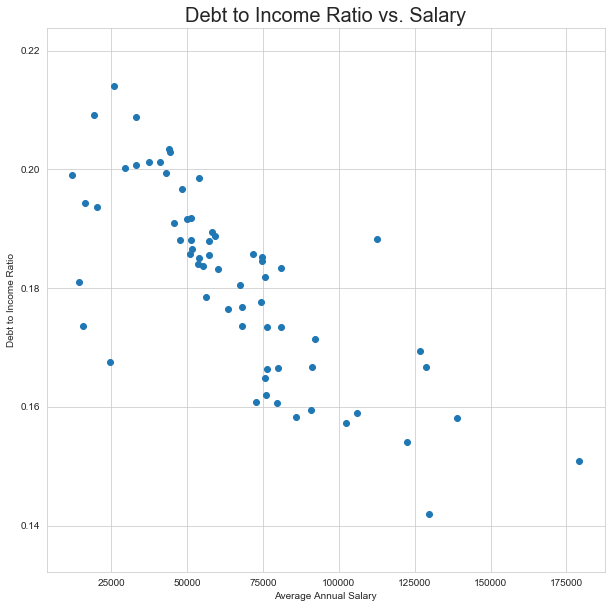

In [556]:
plt.scatter(data = profession_avg, x = "Annual_Income", y = 'LenderYield');
plt.xlabel('Average Annual Salary');
plt.title('Debt to Income Ratio vs. Salary', fontsize = 20)
plt.ylabel('Lender Yield');

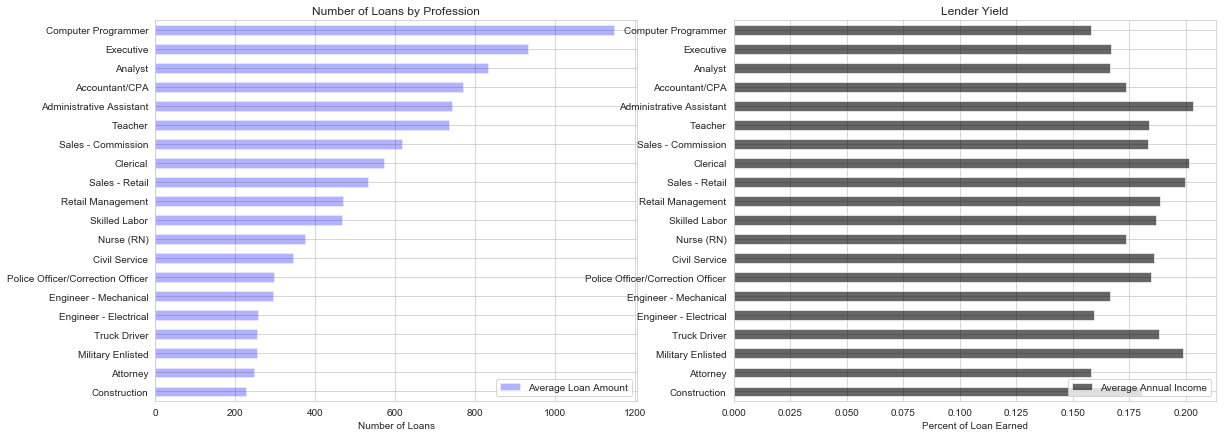

In [544]:
prof_income = profession_avg.sort_values(by = 'ProsperPrincipalBorrowed', ascending = True).tail(20)

location = [0,1,2,3,4,5,6,7,8,9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#sorts the values into the correct order
plt.figure(figsize = [19, 7])

plt.subplot(1, 2, 1)
prof_income['ProsperPrincipalBorrowed'].plot.barh(alpha = 0.3, color = 'blue', label = 'Average Loan Amount');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Number of Loans')
plt.legend(loc = 'lower right');
plt.title("Number of Loans by Profession");

plt.subplot(1, 2, 2)
plt.grid(which = 'major', axis = 'both')
prof_income['LenderYield'].plot.barh(alpha = 0.6, color = 'black', label = 'Average Annual Income');
plt.yticks(location, prof_income.Occupation);
plt.xlabel('Percent of Loan Earned')
plt.legend(loc = 'lower right');
plt.title("Lender Yield");

plt.show()

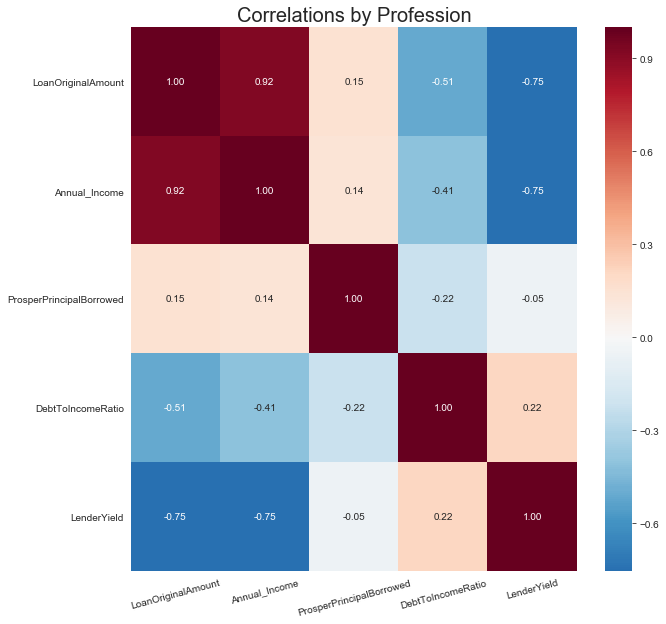

In [552]:
loan_columns = ['LoanOriginalAmount', 'Annual_Income', 'ProsperPrincipalBorrowed', 'DebtToIncomeRatio', 'LenderYield']
plt.subplots(figsize = (10, 10));
sb.heatmap(profession_avg[loan_columns].corr(), cmap = 'RdBu_r', center = 0, annot = True, fmt = '0.2f');
plt.title('Correlations by Profession', fontsize = 20);
plt.xticks(rotation = 15);


In [ ]:
nan = np.nan
df_sample = f_df.sample(3000)
#df_sample.replace([np.inf, -np.inf], np.nan).dropna()

#bins_x = np.arange(0.0, 1 +0.05, 0.05)
#bins_y = np.arange(500, 850 +50, 50)

#c_score_bins = pd.cut(df_sample['Credit_Score_Avg'], bins_x, right = False, include_lowest = False, labels = False).astype(int)
#delinq_bins = pd.cut(df_sample['TradesNeverDelinquent (percentage)'], bins_y, right = False, include_lowest = False, labels = False).astype(int)

#n_points_f = df_sample.query('IsBorrowerHomeowner == False').groupby([bins_x, bins_y]).size()
#n_points_f = n_points_f.reset_index().pivot(index = 'TradesNeverDelinquent (percentage)', columns = 'Credit_Score_Avg').values
#n_points_t = df_sample.query('IsBorrowerHomeowner == True').groupby([bins_x, bins_y]).size()
#n_points_t = n_points_t.reset_index().pivot(index = 'TradesNeverDelinquent (percentage)', columns = 'Credit_Score_Avg').values

#new_weights_f = df['Credit_Score_Avg']/n_points_f[bins_x, bins_y]
#new_weights_t = df['Credit_Score_Avg']/n_points_t[bins_x, bins_y]